In [109]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Flatten, Dense , BatchNormalization
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from scikeras.wrappers import KerasClassifier, KerasRegressor
from keras import initializers , optimizers , activations
import matplotlib.pyplot as plt
import numpy as np

# Preproccesing

In [169]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

In [170]:
X_train, X_test = X_train/255.0, X_test/255.0

# Define the best model for changing the activision and initaliazers

In [181]:
# Assume this model as a given hyperparameters model from last section
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
model.add(Dense(300, activation='selu',
                kernel_initializer = 'lecun_normal'))
model.add(Dense(150, activation='selu',
                kernel_initializer = 'lecun_normal'))
model.add(Dense(10, activation='softmax'))

In [182]:
model.summary()

Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_31 (Flatten)        (None, 3072)              0         
                                                                 
 dense_93 (Dense)            (None, 300)               921900    
                                                                 
 dense_94 (Dense)            (None, 150)               45150     
                                                                 
 dense_95 (Dense)            (None, 10)                1510      
                                                                 
Total params: 968,560
Trainable params: 968,560
Non-trainable params: 0
_________________________________________________________________


In [183]:
# Compile the model with given learning rate from hyperparameters search
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01),
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [184]:
history1 = model.fit(X_train , y_train ,  epochs=50 , validation_split=0.2)

Epoch 1/50
1250/1250 [==============================] - 11s 8ms/step - loss: 1.9579 - accuracy: 0.3041 - val_loss: 1.8158 - val_accuracy: 0.3532
Epoch 2/50
1250/1250 [==============================] - 10s 8ms/step - loss: 1.7468 - accuracy: 0.3770 - val_loss: 1.7085 - val_accuracy: 0.4014
Epoch 3/50
1250/1250 [==============================] - 10s 8ms/step - loss: 1.6608 - accuracy: 0.4087 - val_loss: 1.6922 - val_accuracy: 0.4012
Epoch 4/50
1250/1250 [==============================] - 10s 8ms/step - loss: 1.6079 - accuracy: 0.4290 - val_loss: 1.6197 - val_accuracy: 0.4269
Epoch 5/50
1250/1250 [==============================] - 10s 8ms/step - loss: 1.5656 - accuracy: 0.4456 - val_loss: 1.6554 - val_accuracy: 0.4113
Epoch 6/50
1250/1250 [==============================] - 10s 8ms/step - loss: 1.5326 - accuracy: 0.4597 - val_loss: 1.5980 - val_accuracy: 0.4359
Epoch 7/50
1250/1250 [==============================] - 10s 8ms/step - loss: 1.5046 - accuracy: 0.4653 - val_loss: 1.5581 - val_ac

In [185]:
model_selu = model

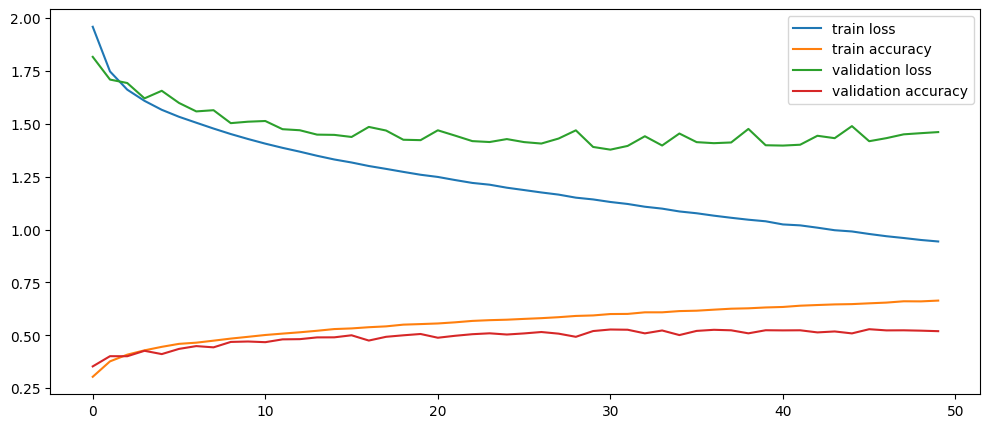

In [186]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(history1.history["loss"], label="train loss")
ax.plot(history1.history["accuracy"], label="train accuracy")
ax.plot(history1.history["val_loss"], label="validation loss")
ax.plot(history1.history["val_accuracy"], label="validation accuracy")
ax.legend()

# Using BatchNormalization

In [187]:
# Changing activation to relu and use batchnormalization after each layer except last layer
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
model.add(BatchNormalization())
model.add(Dense(300, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(150, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax'))


In [188]:
model.summary()

Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_32 (Flatten)        (None, 3072)              0         
                                                                 
 batch_normalization_6 (Batc  (None, 3072)             12288     
 hNormalization)                                                 
                                                                 
 dense_96 (Dense)            (None, 300)               921900    
                                                                 
 batch_normalization_7 (Batc  (None, 300)              1200      
 hNormalization)                                                 
                                                                 
 dense_97 (Dense)            (None, 150)               45150     
                                                                 
 batch_normalization_8 (Batc  (None, 150)            

In [189]:
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01),
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [190]:
history2 = model.fit(X_train , y_train ,  epochs=50 , validation_split=0.2)

Epoch 1/50
1250/1250 [==============================] - 12s 9ms/step - loss: 1.7505 - accuracy: 0.3845 - val_loss: 1.5816 - val_accuracy: 0.4390
Epoch 2/50
1250/1250 [==============================] - 10s 8ms/step - loss: 1.5093 - accuracy: 0.4641 - val_loss: 1.4994 - val_accuracy: 0.4760
Epoch 3/50
1250/1250 [==============================] - 10s 8ms/step - loss: 1.4136 - accuracy: 0.5019 - val_loss: 1.4605 - val_accuracy: 0.4844
Epoch 4/50
1250/1250 [==============================] - 10s 8ms/step - loss: 1.3473 - accuracy: 0.5243 - val_loss: 1.4390 - val_accuracy: 0.4964
Epoch 5/50
1250/1250 [==============================] - 10s 8ms/step - loss: 1.2896 - accuracy: 0.5436 - val_loss: 1.4056 - val_accuracy: 0.5068
Epoch 6/50
1250/1250 [==============================] - 10s 8ms/step - loss: 1.2413 - accuracy: 0.5613 - val_loss: 1.4114 - val_accuracy: 0.5097
Epoch 7/50
1250/1250 [==============================] - 10s 8ms/step - loss: 1.1935 - accuracy: 0.5784 - val_loss: 1.4061 - val_ac

In [191]:
model_relu = model

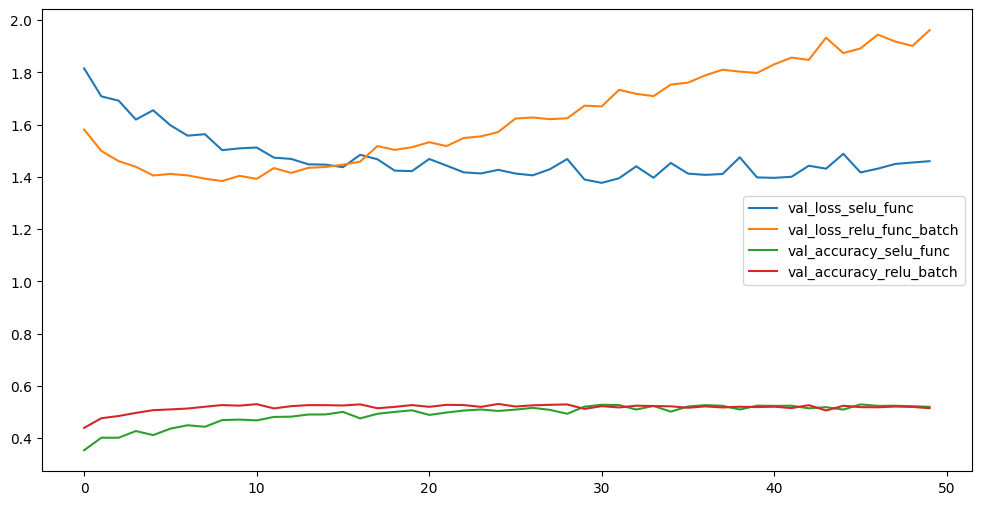

In [192]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(history1.history["val_loss"], label="val_loss_selu_func")
ax.plot(history2.history["val_loss"], label="val_loss_relu_func_batch")
ax.plot(history1.history["val_accuracy"], label="val_accuracy_selu_func")
ax.plot(history2.history["val_accuracy"], label="val_accuracy_relu_batch")
ax.legend()

# Prediction of horse

In [193]:
X_train_new = X_train[:6000, :, :]

In [194]:
X_train_new.shape

(6000, 32, 32, 3)

In [195]:
y_train_new = np.where(y_train == 7, 1, 0)[:6000]

In [196]:
np.count_nonzero(y_train_new == 1)

597

In [197]:
model_relu.save("model0.h5")

In [198]:
model0 = keras.models.load_model("model0.h5")


## Clone model0

In [199]:
model0_cloned = keras.models.clone_model(model0)
model0_cloned.set_weights(model0.get_weights())

## Freezing layers

In [200]:
model1 = keras.models.Sequential(model0.layers[:-1])
model1.add(keras.layers.Dense(1, activation="sigmoid"))
model1.summary()

Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_32 (Flatten)        (None, 3072)              0         
                                                                 
 batch_normalization_6 (Batc  (None, 3072)             12288     
 hNormalization)                                                 
                                                                 
 dense_96 (Dense)            (None, 300)               921900    
                                                                 
 batch_normalization_7 (Batc  (None, 300)              1200      
 hNormalization)                                                 
                                                                 
 dense_97 (Dense)            (None, 150)               45150     
                                                                 
 batch_normalization_8 (Batc  (None, 150)            

In [201]:
for layer in model1.layers[:-1]:
  layer.trainable = False
  print(layer.trainable)

False
False
False
False
False
False


In [202]:
model1.summary()

Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_32 (Flatten)        (None, 3072)              0         
                                                                 
 batch_normalization_6 (Batc  (None, 3072)             12288     
 hNormalization)                                                 
                                                                 
 dense_96 (Dense)            (None, 300)               921900    
                                                                 
 batch_normalization_7 (Batc  (None, 300)              1200      
 hNormalization)                                                 
                                                                 
 dense_97 (Dense)            (None, 150)               45150     
                                                                 
 batch_normalization_8 (Batc  (None, 150)            

## Training model1 for prediction horse image

In [203]:
model1.compile(loss="binary_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [204]:
%%time
history_freez = model1.fit(X_train_new, y_train_new, epochs=50, validation_split=0.2)

Epoch 1/50
150/150 [==============================] - 1s 5ms/step - loss: 0.6502 - accuracy: 0.6690 - val_loss: 0.4432 - val_accuracy: 0.7975
Epoch 2/50
150/150 [==============================] - 0s 3ms/step - loss: 0.3853 - accuracy: 0.8517 - val_loss: 0.3136 - val_accuracy: 0.9042
Epoch 3/50
150/150 [==============================] - 0s 3ms/step - loss: 0.2865 - accuracy: 0.9133 - val_loss: 0.2514 - val_accuracy: 0.9317
Epoch 4/50
150/150 [==============================] - 0s 3ms/step - loss: 0.2340 - accuracy: 0.9408 - val_loss: 0.2151 - val_accuracy: 0.9500
Epoch 5/50
150/150 [==============================] - 0s 3ms/step - loss: 0.2011 - accuracy: 0.9556 - val_loss: 0.1911 - val_accuracy: 0.9558
Epoch 6/50
150/150 [==============================] - 0s 3ms/step - loss: 0.1786 - accuracy: 0.9617 - val_loss: 0.1739 - val_accuracy: 0.9600
Epoch 7/50
150/150 [==============================] - 0s 3ms/step - loss: 0.1621 - accuracy: 0.9679 - val_loss: 0.1609 - val_accuracy: 0.9650
Epoch 

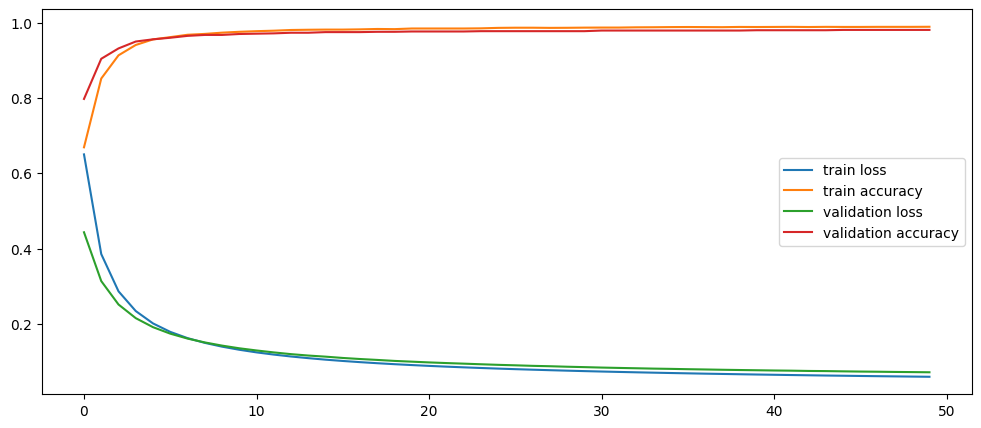

In [205]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(history_freez.history["loss"], label="train loss")
ax.plot(history_freez.history["accuracy"], label="train accuracy")
ax.plot(history_freez.history["val_loss"], label="validation loss")
ax.plot(history_freez.history["val_accuracy"], label="validation accuracy")
ax.legend()

## Without freezing layers

In [206]:
model0 = keras.models.load_model("model0.h5")

In [208]:
model1 = keras.models.Sequential(model0.layers[:-1])
model1.add(keras.layers.Dense(1, activation="sigmoid"))

In [209]:
for layer in model1.layers[:-1]:
  layer.trainable = True
  print(layer.trainable)

True
True
True
True
True
True


In [210]:
model1.summary()

Model: "sequential_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_32 (Flatten)        (None, 3072)              0         
                                                                 
 batch_normalization_6 (Batc  (None, 3072)             12288     
 hNormalization)                                                 
                                                                 
 dense_96 (Dense)            (None, 300)               921900    
                                                                 
 batch_normalization_7 (Batc  (None, 300)              1200      
 hNormalization)                                                 
                                                                 
 dense_97 (Dense)            (None, 150)               45150     
                                                                 
 batch_normalization_8 (Batc  (None, 150)            

In [211]:
model1.compile(loss="binary_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [212]:
%%time
history_nofreez = model1.fit(X_train_new, y_train_new, epochs=50, validation_split=0.2)

Epoch 1/50
150/150 [==============================] - 4s 9ms/step - loss: 0.5282 - accuracy: 0.7442 - val_loss: 0.3248 - val_accuracy: 0.8858
Epoch 2/50
150/150 [==============================] - 1s 8ms/step - loss: 0.2621 - accuracy: 0.9208 - val_loss: 0.2172 - val_accuracy: 0.9275
Epoch 3/50
150/150 [==============================] - 1s 8ms/step - loss: 0.1820 - accuracy: 0.9483 - val_loss: 0.1772 - val_accuracy: 0.9425
Epoch 4/50
150/150 [==============================] - 1s 8ms/step - loss: 0.1435 - accuracy: 0.9621 - val_loss: 0.1521 - val_accuracy: 0.9517
Epoch 5/50
150/150 [==============================] - 1s 8ms/step - loss: 0.1153 - accuracy: 0.9702 - val_loss: 0.1403 - val_accuracy: 0.9467
Epoch 6/50
150/150 [==============================] - 1s 8ms/step - loss: 0.0946 - accuracy: 0.9771 - val_loss: 0.1282 - val_accuracy: 0.9558
Epoch 7/50
150/150 [==============================] - 1s 8ms/step - loss: 0.0814 - accuracy: 0.9817 - val_loss: 0.1273 - val_accuracy: 0.9533
Epoch 

#### it can be clearly seen that proccesing of frozen layers is faster than unfrozen layers

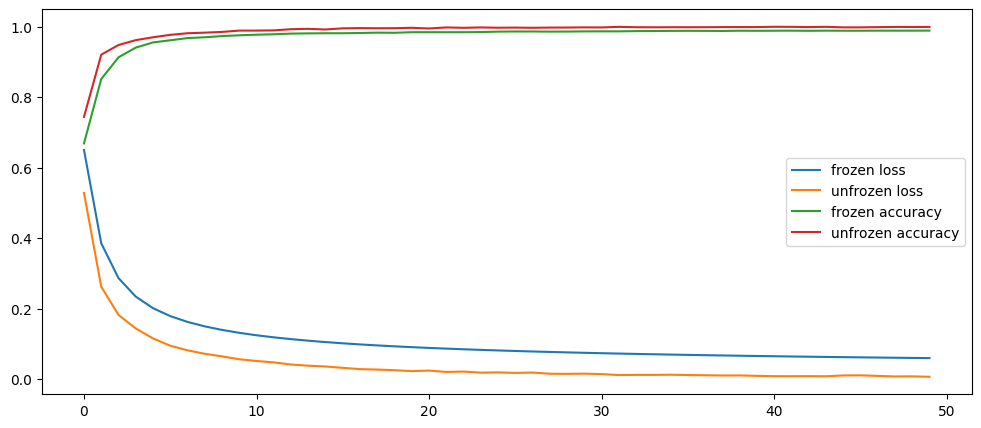

In [213]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(history_freez.history["loss"], label="frozen loss")
ax.plot(history_nofreez.history["loss"], label="unfrozen loss")
ax.plot(history_freez.history["accuracy"], label="frozen accuracy")
ax.plot(history_nofreez.history["accuracy"], label="unfrozen accuracy")
ax.legend()

# Different Optimizers

In [214]:
def Ann_model(optimizer):
    model = keras.models.Sequential()
    model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
    model.add(Dense(300, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(150, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(10, activation='softmax'))
    
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    # Train the model for 50 epochs
    history = model.fit(X_train, y_train, epochs=50, validation_split=0.2)
    
    # Get the training accuracies and losses of epochs
    return history.history['accuracy'] , history.history['loss']


### Adam

In [215]:
optimizer = optimizers.Adam(lr=0.01)
acc_adam , loss_adam = Ann_model(optimizer)

Epoch 1/50
1250/1250 [==============================] - 10s 8ms/step - loss: 1.8406 - accuracy: 0.3422 - val_loss: 1.7577 - val_accuracy: 0.3773
Epoch 2/50
1250/1250 [==============================] - 10s 8ms/step - loss: 1.6607 - accuracy: 0.4095 - val_loss: 1.6625 - val_accuracy: 0.4110
Epoch 3/50
1250/1250 [==============================] - 9s 8ms/step - loss: 1.6025 - accuracy: 0.4280 - val_loss: 1.8854 - val_accuracy: 0.3659
Epoch 4/50
1250/1250 [==============================] - 10s 8ms/step - loss: 1.5707 - accuracy: 0.4425 - val_loss: 1.6140 - val_accuracy: 0.4452
Epoch 5/50
1250/1250 [==============================] - 9s 8ms/step - loss: 1.5393 - accuracy: 0.4530 - val_loss: 1.5970 - val_accuracy: 0.4394
Epoch 6/50
1250/1250 [==============================] - 10s 8ms/step - loss: 1.5139 - accuracy: 0.4593 - val_loss: 1.6256 - val_accuracy: 0.4321
Epoch 7/50
1250/1250 [==============================] - 10s 8ms/step - loss: 1.4946 - accuracy: 0.4717 - val_loss: 1.6189 - val_accu

### AdaGrad

In [216]:
optimizer = optimizers.Adagrad(lr=0.01)
acc_adagrad , loss_adagrad = Ann_model(optimizer)

Epoch 1/50
1250/1250 [==============================] - 11s 8ms/step - loss: 1.7460 - accuracy: 0.3818 - val_loss: 1.6946 - val_accuracy: 0.4042
Epoch 2/50
1250/1250 [==============================] - 10s 8ms/step - loss: 1.5846 - accuracy: 0.4436 - val_loss: 1.6056 - val_accuracy: 0.4361
Epoch 3/50
1250/1250 [==============================] - 10s 8ms/step - loss: 1.5129 - accuracy: 0.4698 - val_loss: 1.6559 - val_accuracy: 0.4287
Epoch 4/50
1250/1250 [==============================] - 10s 8ms/step - loss: 1.4671 - accuracy: 0.4852 - val_loss: 1.6891 - val_accuracy: 0.4140
Epoch 5/50
1250/1250 [==============================] - 10s 8ms/step - loss: 1.4339 - accuracy: 0.4988 - val_loss: 1.5602 - val_accuracy: 0.4554
Epoch 6/50
1250/1250 [==============================] - 10s 8ms/step - loss: 1.4038 - accuracy: 0.5077 - val_loss: 1.5862 - val_accuracy: 0.4451
Epoch 7/50
1250/1250 [==============================] - 10s 8ms/step - loss: 1.3773 - accuracy: 0.5177 - val_loss: 1.5785 - val_ac

### Nadam

In [217]:
optimizer = optimizers.Nadam(lr=0.01)
acc_nadam , loss_nadam = Ann_model(optimizer)

Epoch 1/50
1250/1250 [==============================] - 20s 15ms/step - loss: 1.8252 - accuracy: 0.3503 - val_loss: 1.7764 - val_accuracy: 0.3694
Epoch 2/50
1250/1250 [==============================] - 18s 15ms/step - loss: 1.6512 - accuracy: 0.4105 - val_loss: 1.8178 - val_accuracy: 0.3811
Epoch 3/50
1250/1250 [==============================] - 18s 15ms/step - loss: 1.6002 - accuracy: 0.4299 - val_loss: 1.6763 - val_accuracy: 0.4267
Epoch 4/50
1250/1250 [==============================] - 18s 15ms/step - loss: 1.5690 - accuracy: 0.4392 - val_loss: 1.6530 - val_accuracy: 0.4225
Epoch 5/50
1250/1250 [==============================] - 18s 15ms/step - loss: 1.5411 - accuracy: 0.4510 - val_loss: 1.8273 - val_accuracy: 0.3869
Epoch 6/50
1250/1250 [==============================] - 18s 15ms/step - loss: 1.5149 - accuracy: 0.4621 - val_loss: 2.1266 - val_accuracy: 0.3207
Epoch 7/50
1250/1250 [==============================] - 18s 15ms/step - loss: 1.5045 - accuracy: 0.4665 - val_loss: 1.7060 -

### SGD

In [218]:
optimizer = optimizers.SGD(lr=0.01)
acc_sgd , loss_sgd = Ann_model(optimizer)

Epoch 1/50
1250/1250 [==============================] - 10s 8ms/step - loss: 1.7750 - accuracy: 0.3765 - val_loss: 1.6531 - val_accuracy: 0.4215
Epoch 2/50
1250/1250 [==============================] - 9s 8ms/step - loss: 1.5786 - accuracy: 0.4428 - val_loss: 1.6731 - val_accuracy: 0.4057
Epoch 3/50
1250/1250 [==============================] - 10s 8ms/step - loss: 1.5164 - accuracy: 0.4635 - val_loss: 1.6141 - val_accuracy: 0.4365
Epoch 4/50
1250/1250 [==============================] - 9s 8ms/step - loss: 1.4711 - accuracy: 0.4821 - val_loss: 1.6193 - val_accuracy: 0.4343
Epoch 5/50
1250/1250 [==============================] - 9s 8ms/step - loss: 1.4373 - accuracy: 0.4922 - val_loss: 1.6151 - val_accuracy: 0.4420
Epoch 6/50
1250/1250 [==============================] - 9s 8ms/step - loss: 1.4074 - accuracy: 0.5003 - val_loss: 1.6785 - val_accuracy: 0.4165
Epoch 7/50
1250/1250 [==============================] - 9s 8ms/step - loss: 1.3888 - accuracy: 0.5077 - val_loss: 1.5431 - val_accurac

### SGD with momentum

In [219]:
optimizer = optimizers.SGD(lr=0.01, momentum=0.9)
acc_sgd_m , loss_sgd_m = Ann_model(optimizer)

Epoch 1/50
1250/1250 [==============================] - 11s 8ms/step - loss: 1.8024 - accuracy: 0.3620 - val_loss: 1.7323 - val_accuracy: 0.3948
Epoch 2/50
1250/1250 [==============================] - 10s 8ms/step - loss: 1.6376 - accuracy: 0.4156 - val_loss: 1.8522 - val_accuracy: 0.3586
Epoch 3/50
1250/1250 [==============================] - 10s 8ms/step - loss: 1.5780 - accuracy: 0.4388 - val_loss: 1.7702 - val_accuracy: 0.3931
Epoch 4/50
1250/1250 [==============================] - 10s 8ms/step - loss: 1.5248 - accuracy: 0.4594 - val_loss: 1.6719 - val_accuracy: 0.4257
Epoch 5/50
1250/1250 [==============================] - 10s 8ms/step - loss: 1.4966 - accuracy: 0.4654 - val_loss: 1.7495 - val_accuracy: 0.3947
Epoch 6/50
1250/1250 [==============================] - 10s 8ms/step - loss: 1.4539 - accuracy: 0.4820 - val_loss: 1.7323 - val_accuracy: 0.4154
Epoch 7/50
1250/1250 [==============================] - 10s 8ms/step - loss: 1.4164 - accuracy: 0.4937 - val_loss: 1.6415 - val_ac

### Nesterov SGD with momentum

In [220]:
optimizer = optimizers.SGD(lr=0.01, momentum=0.9, nesterov=True)
acc_sgd_m_nes , loss_sgd_m_nes = Ann_model(optimizer)

Epoch 1/50
1250/1250 [==============================] - 11s 8ms/step - loss: 1.7865 - accuracy: 0.3641 - val_loss: 1.7924 - val_accuracy: 0.3688
Epoch 2/50
1250/1250 [==============================] - 10s 8ms/step - loss: 1.6261 - accuracy: 0.4221 - val_loss: 1.8833 - val_accuracy: 0.3658
Epoch 3/50
1250/1250 [==============================] - 10s 8ms/step - loss: 1.5675 - accuracy: 0.4451 - val_loss: 1.7789 - val_accuracy: 0.3741
Epoch 4/50
1250/1250 [==============================] - 10s 8ms/step - loss: 1.5282 - accuracy: 0.4567 - val_loss: 1.7712 - val_accuracy: 0.3825
Epoch 5/50
1250/1250 [==============================] - 10s 8ms/step - loss: 1.4742 - accuracy: 0.4733 - val_loss: 1.5537 - val_accuracy: 0.4614
Epoch 6/50
1250/1250 [==============================] - 10s 8ms/step - loss: 1.4349 - accuracy: 0.4895 - val_loss: 1.5728 - val_accuracy: 0.4455
Epoch 7/50
1250/1250 [==============================] - 10s 8ms/step - loss: 1.4118 - accuracy: 0.4987 - val_loss: 1.7047 - val_ac

## Plot

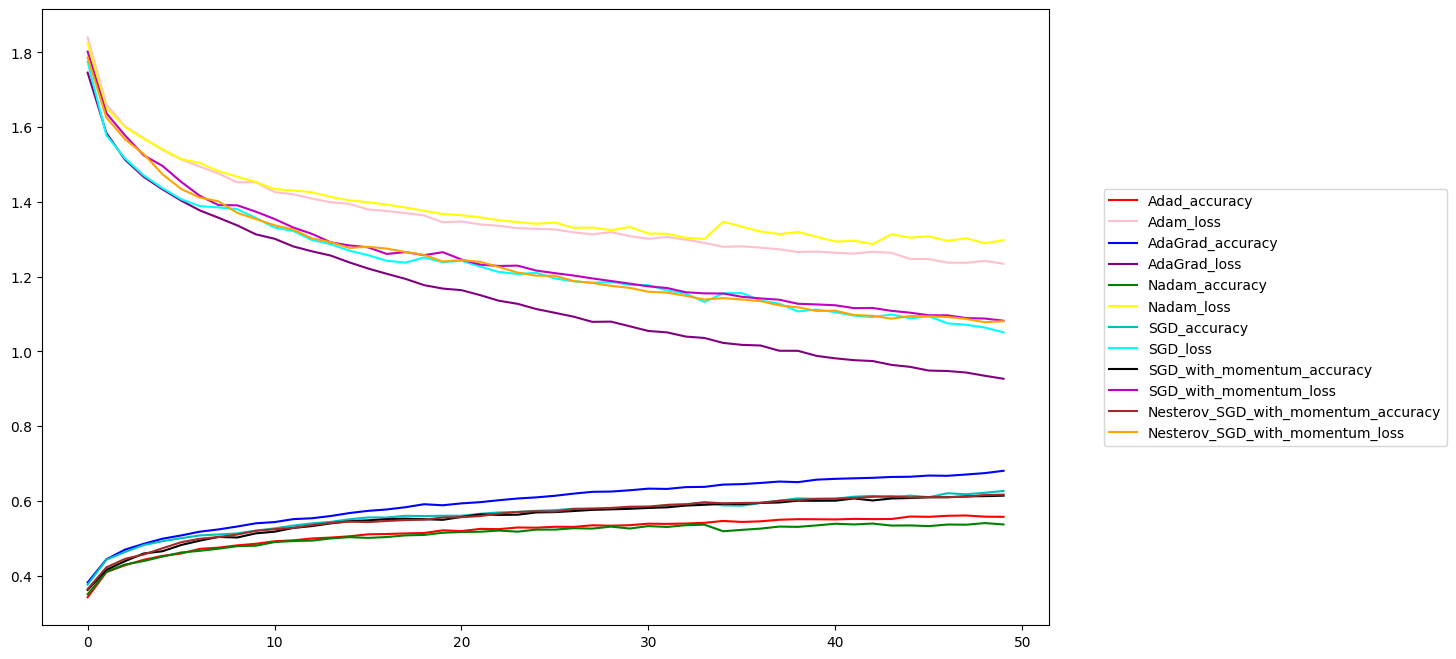

In [221]:
fig, ax = plt.subplots(figsize=(13, 8))
ax.plot(acc_adam, label="Adad_accuracy" , color='r')
ax.plot(loss_adam, label="Adam_loss", color='pink')
ax.plot(acc_adagrad, label="AdaGrad_accuracy", color='b')
ax.plot(loss_adagrad, label="AdaGrad_loss", color='purple')
ax.plot(acc_nadam, label="Nadam_accuracy", color='g')
ax.plot(loss_nadam, label="Nadam_loss", color='yellow')
ax.plot(acc_sgd, label="SGD_accuracy", color='c')
ax.plot(loss_sgd, label="SGD_loss", color='cyan')
ax.plot(acc_sgd_m, label="SGD_with_momentum_accuracy", color='k')
ax.plot(loss_sgd_m, label="SGD_with_momentum_loss", color='m')
ax.plot(acc_sgd_m_nes, label="Nesterov_SGD_with_momentum_accuracy", color='brown')
ax.plot(loss_sgd_m_nes, label="Nesterov_SGD_with_momentum_loss", color='orange')
ax.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=1)


# Regularization

## L1 and L2

In [229]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
model.add(Dense(300, activation='relu' ,
                       kernel_initializer="he_normal",
                       kernel_regularizer=keras.regularizers.l2(0.01)))
model.add(Dense(150, activation='relu',
                       kernel_initializer="he_normal"))
model.add(Dense(10, activation='softmax'))
    
model.compile(optimizer=optimizers.Adagrad(lr=0.01), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_l1_l2 = model.fit(X_train, y_train, epochs=100, validation_split=0.2)


Epoch 1/100
1250/1250 [==============================] - 11s 9ms/step - loss: 4.9948 - accuracy: 0.3114 - val_loss: 3.2002 - val_accuracy: 0.3408
Epoch 2/100
1250/1250 [==============================] - 10s 8ms/step - loss: 2.5153 - accuracy: 0.3766 - val_loss: 2.1065 - val_accuracy: 0.4043
Epoch 3/100
1250/1250 [==============================] - 10s 8ms/step - loss: 1.9592 - accuracy: 0.3951 - val_loss: 1.9101 - val_accuracy: 0.3887
Epoch 4/100
1250/1250 [==============================] - 10s 8ms/step - loss: 1.8068 - accuracy: 0.4116 - val_loss: 1.7802 - val_accuracy: 0.4149
Epoch 5/100
1250/1250 [==============================] - 10s 8ms/step - loss: 1.7450 - accuracy: 0.4248 - val_loss: 1.7508 - val_accuracy: 0.4240
Epoch 6/100
1250/1250 [==============================] - 10s 8ms/step - loss: 1.7162 - accuracy: 0.4324 - val_loss: 1.7423 - val_accuracy: 0.4237
Epoch 7/100
1250/1250 [==============================] - 10s 8ms/step - loss: 1.6920 - accuracy: 0.4359 - val_loss: 1.7004 -

In [230]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
model.add(keras.layers.Dropout(0.2))
model.add(Dense(300, activation='relu' ,
                       kernel_initializer="he_normal",
                       kernel_regularizer=keras.regularizers.l2(0.01)))
model.add(keras.layers.Dropout(0.2))
model.add(Dense(150, activation='relu',
                       kernel_initializer="he_normal"))
model.add(keras.layers.Dropout(0.2))
model.add(Dense(10, activation='softmax'))
    
model.compile(optimizer=optimizers.Adagrad(lr=0.01), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_dropout = model.fit(X_train, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
1250/1250 [==============================] - 12s 9ms/step - loss: 5.1129 - accuracy: 0.2572 - val_loss: 3.2290 - val_accuracy: 0.3335
Epoch 2/100
1250/1250 [==============================] - 11s 8ms/step - loss: 2.6188 - accuracy: 0.3227 - val_loss: 2.1483 - val_accuracy: 0.3735
Epoch 3/100
1250/1250 [==============================] - 11s 8ms/step - loss: 2.0652 - accuracy: 0.3452 - val_loss: 1.9106 - val_accuracy: 0.3788
Epoch 4/100
1250/1250 [==============================] - 11s 9ms/step - loss: 1.9163 - accuracy: 0.3593 - val_loss: 1.8221 - val_accuracy: 0.3958
Epoch 5/100
1250/1250 [==============================] - 11s 8ms/step - loss: 1.8641 - accuracy: 0.3689 - val_loss: 1.8319 - val_accuracy: 0.3859
Epoch 6/100
1250/1250 [==============================] - 11s 9ms/step - loss: 1.8311 - accuracy: 0.3789 - val_loss: 1.7795 - val_accuracy: 0.4017
Epoch 7/100
1250/1250 [==============================] - 11s 8ms/step - loss: 1.8109 - accuracy: 0.3854 - val_loss: 1.7450 -

In [231]:
model_mcd = np.stack([model(X_test, training=True) for _ in range(100)])

In [328]:
y_pred = np.argmax(model_mcd, axis=2)  # Shape: (100, 1000)
y_pred.shape

(100, 10000)

In [329]:
acc_mcd = np.mean(y_pred == y_test.reshape(-1), axis=1)

In [334]:
acc_mcd.shape

(100,)

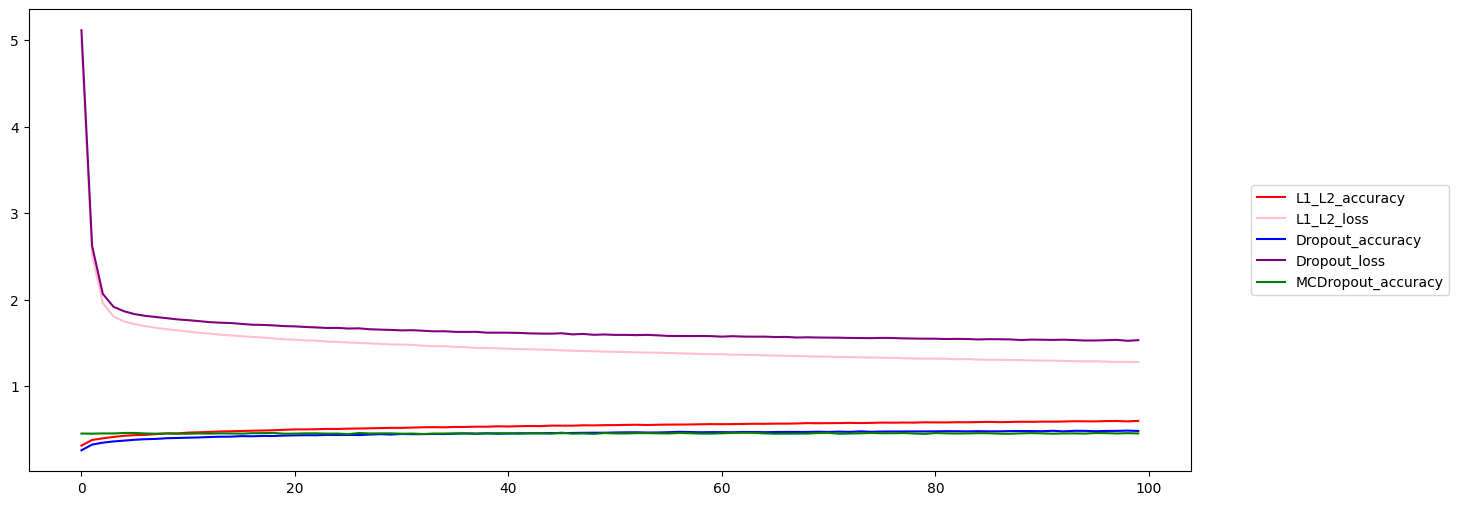

In [333]:
fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(history_l1_l2.history['accuracy'], label="L1_L2_accuracy" , color='r')
ax.plot(history_l1_l2.history['loss'] ,label="L1_L2_loss", color='pink')
ax.plot(history_dropout.history['accuracy'], label="Dropout_accuracy", color='b')
ax.plot(history_dropout.history['loss'], label="Dropout_loss", color='purple')
ax.plot(acc_mcd, label="MCDropout_accuracy", color='g')
ax.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=1)

#### what stands out from the graph is that the performance of the model is better than previous methods because in regulizeration methods, the model will not be overfitted after the numbers of epoch. It is noticeable that the accuracy and loss are not going to reach higher rates but in this case, stopping overfitting is best result that we can get.